<a href="https://colab.research.google.com/github/rath772k/Machine-learning-problems/blob/master/codemarathonML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rath772k","key":"10f609c84776cce235080e8155149c07"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c code-marathon-ml

 99% 1.25G/1.26G [00:10<00:00, 50.6MB/s]
100% 1.26G/1.26G [00:10<00:00, 126MB/s] 


In [0]:
!unzip \data.zip

Archive:  data.zip
  inflating: data/test.csv           
   creating: data/test/
  inflating: data/test/0test.png     
  inflating: data/test/10000test.png  
  inflating: data/test/10001test.png  
  inflating: data/test/10002test.png  
  inflating: data/test/10003test.png  
  inflating: data/test/10004test.png  
  inflating: data/test/10005test.png  
  inflating: data/test/10006test.png  
  inflating: data/test/10007test.png  
  inflating: data/test/10008test.png  
  inflating: data/test/10009test.png  
  inflating: data/test/1000test.png  
  inflating: data/test/10010test.png  
  inflating: data/test/10011test.png  
  inflating: data/test/10012test.png  
  inflating: data/test/10013test.png  
  inflating: data/test/10014test.png  
  inflating: data/test/10015test.png  
  inflating: data/test/10016test.png  
  inflating: data/test/10017test.png  
  inflating: data/test/10018test.png  
  inflating: data/test/10019test.png  
  inflating: data/test/1001test.png  
  inflating: data/test/10

In [0]:
image=cv2.imread('data/train/18431.png',cv2.IMREAD_GRAYSCALE)

In [0]:
image.shape

(256, 256)

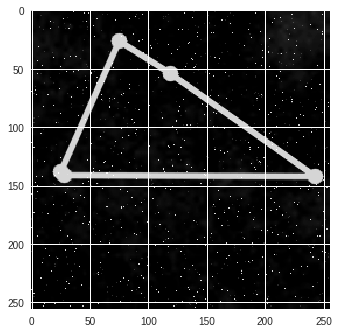

In [0]:
plt.imshow(image,aspect='equal')

In [0]:

blurred = cv2.medianBlur(image,3)

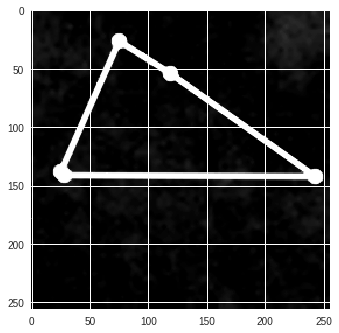

In [0]:
plt.imshow(blurred)

In [0]:
import glob
filename=glob.glob('data/train/*.png')
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

filename.sort(key=natural_keys)

In [0]:
images=np.array([cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in filename])

In [0]:
for i in range(images.shape[0]):
    images[i] = cv2.medianBlur(images[i],3)

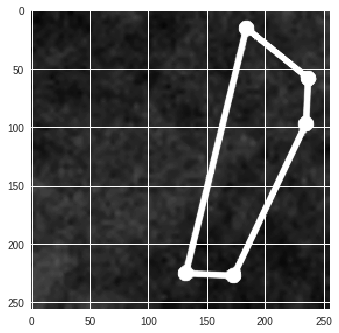

In [0]:
plt.imshow(images[0])

In [0]:
images=images.reshape(18432,256,256,1)

In [0]:
from keras.models import Model, Sequential
from keras.layers import *
import pandas as pd

Using TensorFlow backend.


In [0]:
train=pd.read_csv('data/train.csv',header=None,skiprows=1)

In [0]:
labels=np.array(train.iloc[:,1],dtype=int)-3

In [0]:
labels

array([2, 5, 1, ..., 2, 1, 2])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

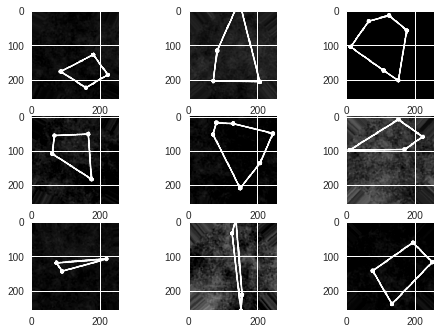

In [0]:
# Rotate images by 90 degrees
datagen = ImageDataGenerator(rotation_range=90)

# fit parameters from data
datagen.fit(images[0:100,:].reshape(100,256,256,1))

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(images[0:100,:].reshape(100,256,256,1),labels[0:100], batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(256,256))
    break

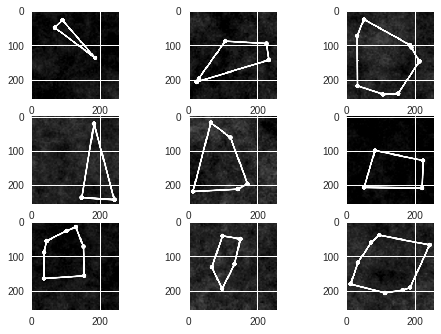

In [0]:
# flip vertically
datagen = ImageDataGenerator(vertical_flip=True)

# fit parameters from data
datagen.fit(images[0:100,:].reshape(100,256,256,1))

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(images[0:100,:].reshape(100,256,256,1),labels[0:100], batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(256,256))
    break

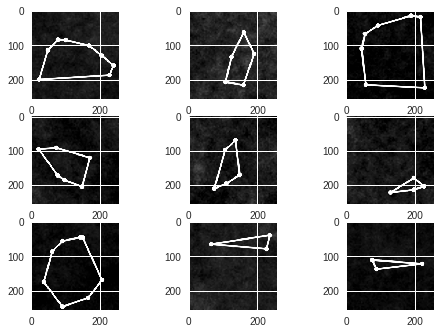

In [0]:
# horizontal flip
datagen = ImageDataGenerator(horizontal_flip=True)

# fit parameters from data
datagen.fit(images[0:100,:].reshape(100,256,256,1))

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(images[0:100,:].reshape(100,256,256,1),labels[0:100], batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(256,256))
    break

In [0]:
model = Sequential()
model.add(InputLayer((256,256,1)))
model.add(Conv2D(32, (11, 11)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Conv2D(32, (7, 7)))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Conv2D(16,(5, 5)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(16, (5, 5)))
model.add(Dropout(0.5))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Conv2D(2, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 246, 246, 32)      3904      
_________________________________________________________________
batch_normalization_1 (Batch (None, 246, 246, 32)      128       
_________________________________________________________________
activation_9 (Activation)    (None, 246, 246, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 246, 246, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 240, 240, 32)      50208     
_________________________________________________________________
dropout_7 (Dropout)          (None, 240, 240, 32)      0         
_________________________________________________________________
activation_10 (Activation)   (None, 240, 240, 32)      0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
from keras.utils import to_categorical
labels=to_categorical(labels)

In [0]:
from keras.utils import Sequence
import math
class data_gen(Sequence):
  def __init__(self,data,labels,batch_size):
    self.dataset = data
    self.target = labels
    self.batch_length = batch_size
    self.size=len(data)
    
  def __getitem__(self,i):
    start=i*self.batch_length
    end=min(start+self.batch_length,self.size)
    return self.dataset[start:end],self.target[start:end]
  
  def __len__(self):
    return math.ceil(self.size/self.batch_length)

In [0]:
datagen=data_gen(images,labels,32)

In [0]:
# Rotate images by 90 degrees
datagen1 = ImageDataGenerator(rotation_range=90)

# fit parameters from data
datagen1.fit(images)

In [0]:
# flip vertically
datagen = ImageDataGenerator(vertical_flip=True)

# fit parameters from data
datagen.fit(images)

In [0]:
# horizontal flip
datagen = ImageDataGenerator(horizontal_flip=True)

# fit parameters from data
datagen.fit(images)

In [0]:
datagen.flow(images, labels , batch_size=32)

In [0]:
import gc

In [0]:
for i in range(5):
  # Rotate images by 90 degrees
  datagen = ImageDataGenerator(rotation_range=90)
  # fit parameters from data
  datagen.fit(images)
  model.fit_generator(datagen.flow(images, labels , batch_size=32)
                      ,samples_per_epoch=len(images),epochs=1)
  del datagen
  gc.collect()
  # flip vertically
  datagen = ImageDataGenerator(rotation_range=90)
  # fit parameters from data
  datagen.fit(images)
  model.fit_generator(datagen.flow(images, labels , batch_size=32)
                      ,samples_per_epoch=len(images),epochs=1)
  del datagen
  gc.collect()
  # flip horizontally
  datagen = ImageDataGenerator(rotation_range=90)
  # fit parameters from data
  datagen.fit(images)
  model.fit_generator(datagen.flow(images, labels , batch_size=32)
                      ,samples_per_epoch=len(images),epochs=1)
  del datagen
  gc.collect()

In [0]:
op=model.predict(images)

In [0]:
print(np.mean(np.argmax(op,axis=1)==np.argmax(labels,axis=1)))

0.4450412326388889


In [0]:
np.argmax(labels[0:10],axis=1)

array([2, 5, 1, 4, 1, 5, 4, 2, 0, 4])

In [0]:
model.save_weights('/content/gdrive/My Drive/weights')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls /content/gdrive/'My Drive'

 201806301921275213PWDdigital.pdf
 227882024-Physics-Project.docx
'baghath AAdhar card 1.jpg'
'baghath AAdhar card.jpg'
'bank statement.zip'
'BHARATH 20.06.15.xls'
'Colab Notebooks'
 CSCPRO_1.CPP
'Electromagnetics by Griffiths.pdf'
 FEBRUARY.docx
'HDFC Bank Credit Card.pdf'
'https:  davmatricmgp.schoolskies.com Fees PrintFee'
'https:  davmatricmgp.schoolskies.com Fees PrintFee (1)'
'iit dhanbad fee payment.pdf'
 IMG_20170802_192157.jpg
 IMG_20180605_182041_HHT.jpg
 IMG-20180731-WA0000.jpg
 IMG-20180731-WA0002.jpg
 JANUARY.docx
'JEE(Main)_AcknowledgementPage (1).pdf'
'MARCH 2018.docx'
 photo.jpg
 Screenshot_2019-02-10-23-33-07-016_com.android.vending.png
 Screenshot_2019-03-05-13-27-02-223_net.one97.paytm.png
 SOA_20180827140205000274.pdf
'Untitled document (1).gdoc'
'Untitled document.gdoc'
 vcards_20180719_071812.vcf
'Video from Sudha'
'webview (1).pdf'
 webview.pdf
 weights


In [0]:
model.load_weights('/content/gdrive/My Drive/weights')

In [0]:
import glob
filename=glob.glob('data/test/*.png')
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

filename.sort(key=natural_keys)

In [0]:
images_test=np.array([cv2.imread(file,cv2.IMREAD_GRAYSCALE) for file in filename])

In [0]:
for i in range(images_test.shape[0]):
    images_test[i] = cv2.medianBlur(images[i],3)

In [0]:
op=model.predict(images_test[...,None])

In [0]:
op=np.argmax(op,axis=1)

In [0]:
test=pd.read_csv('data/test.csv')

In [0]:
test=pd.concat([test,pd.DataFrame(op+3)],axis=1,ignore_index=True)

In [0]:
test.head()

,0,1
0,0test.png,7
1,1test.png,8
2,2test.png,4
3,3test.png,8
4,4test.png,5


In [0]:
test.to_csv('result4.csv',index=False,index_label=['image_name','n_sides'])

In [0]:
from google.colab import files

In [0]:
files.download("result4.csv")